<a href="https://colab.research.google.com/github/PrathameshP26/DNN/blob/main/Mask_RCNN_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
import cv2
import matplotlib.pyplot as plt

In [2]:
model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:02<00:00, 80.7MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [3]:
image=plt.imread('/content/drive/MyDrive/NLP/Computer Vision/datasets/images/jungle.jpg')
image_tensor=torchvision.transforms.functional.to_tensor(image)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [4]:
outputs=model([image_tensor])
predictions=outputs[0]['boxes'].data.numpy()
classes=outputs[0]['labels'].data.numpy()
scores=outputs[0]['scores'].data.numpy()

In [5]:
classes

array([25, 24, 24, 24])

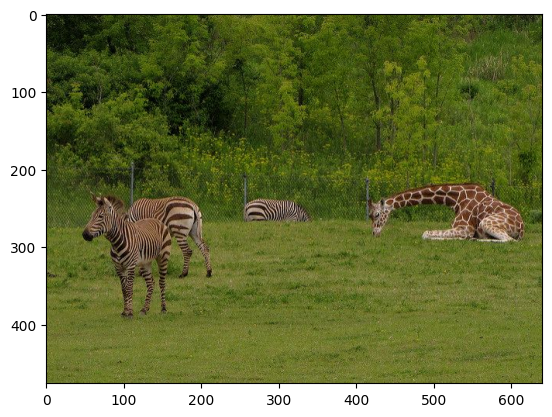

In [6]:
plt.imshow(image)

In [7]:
for prediction,class_id,score in zip(predictions,classes,scores):
  x1,y1,x2,y2=prediction.astype(int)
  cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
  #cv2.putText(image,f"{model.names[class_id]}{score:.2f}"{x1,y1})

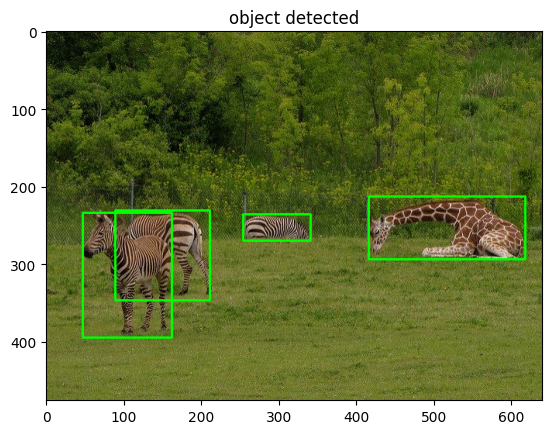

In [8]:
plt.title('object detected')
plt.imshow(image)

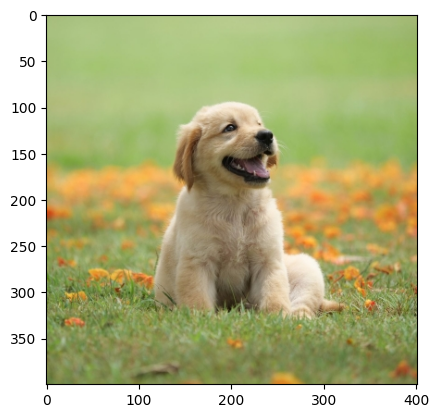

In [9]:
image1=plt.imread('/content/drive/MyDrive/NLP/Computer Vision/datasets/images/dog.jpg')
plt.imshow(image1)

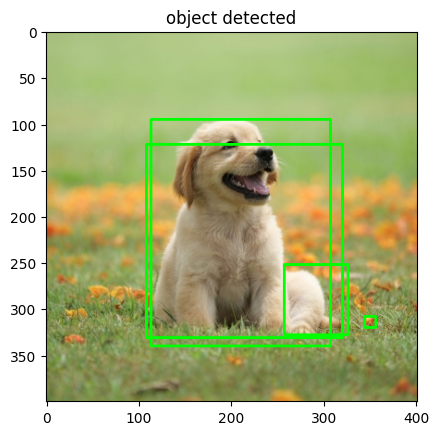

In [10]:
image_tensor=torchvision.transforms.functional.to_tensor(image1)
outputs=model([image_tensor])
predictions=outputs[0]['boxes'].data.numpy()
classes=outputs[0]['labels'].data.numpy()
scores=outputs[0]['scores'].data.numpy()
for prediction,class_id,score in zip(predictions,classes,scores):
  x1,y1,x2,y2=prediction.astype(int)
  cv2.rectangle(image1,(x1,y1),(x2,y2),(0,255,0),2)
plt.title('object detected')
plt.imshow(image1)

In [ ]:
classes,scores

(array([18, 23, 55, 23]),
 array([0.99684983, 0.18864857, 0.09601821, 0.08337782], dtype=float32))

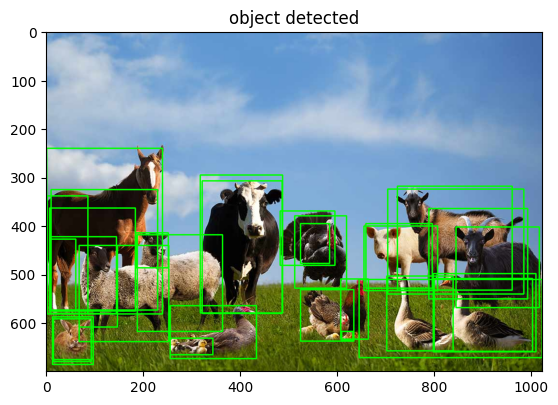

In [ ]:
image2=plt.imread('/content/Farm-Animal-Names-In-English-For-Kids.jpg')
plt.title('before object detection')
plt.imshow(image2)
image_tensor=torchvision.transforms.functional.to_tensor(image2)
outputs=model([image_tensor])
predictions=outputs[0]['boxes'].data.numpy()
classes=outputs[0]['labels'].data.numpy()
scores=outputs[0]['scores'].data.numpy()
for prediction,class_id,score in zip(predictions,classes,scores):
  x1,y1,x2,y2=prediction.astype(int)
  cv2.rectangle(image2,(x1,y1),(x2,y2),(0,255,0),2)
plt.title('object detected')
plt.imshow(image2)

In [ ]:
len (classes)


33